In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df=pd.read_csv("youtube.csv")
df.head()

,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13/11/2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13/11/2017,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12/11/2017,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13/11/2017,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,12/11/2017,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161470 entries, 0 to 161469
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   index                   161470 non-null  int64 
 1   video_id                161470 non-null  object
 2   trending_date           161470 non-null  object
 3   title                   161470 non-null  object
 4   channel_title           161470 non-null  object
 5   category_id             161470 non-null  int64 
 6   publish_date            161470 non-null  object
 7   time_frame              161470 non-null  object
 8   published_day_of_week   161470 non-null  object
 9   publish_country         161470 non-null  object
 10  tags                    161470 non-null  object
 11  views                   161470 non-null  int64 
 12  likes                   161470 non-null  int64 
 13  dislikes                161470 non-null  int64 
 14  comment_count           161470 non-n

In [4]:
df.describe()

,index,category_id,views,likes,dislikes,comment_count
count,161470.00000,161470.000000,1.614700e+05,1.614700e+05,1.614700e+05,1.614700e+05
mean,80734.50000,19.461151,2.419854e+06,6.566194e+04,3.490153e+03,7.035494e+03
std,46612.51832,7.432001,1.043749e+07,2.260617e+05,3.114779e+04,3.404121e+04
min,0.00000,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,40367.25000,15.000000,1.015382e+05,1.975000e+03,8.500000e+01,2.790000e+02
50%,80734.50000,23.000000,3.847395e+05,9.840000e+03,3.480000e+02,1.144000e+03
75%,121101.75000,24.000000,1.339528e+06,4.006275e+04,1.350000e+03,4.144750e+03
max,161469.00000,44.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


In [5]:
df.drop(df.loc[:,:'trending_date'],axis=1,inplace=True)

In [6]:
df.head()

,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13/11/2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13/11/2017,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12/11/2017,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13/11/2017,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False
4,I Dare You: GOING BALD!?,nigahiga,24,12/11/2017,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False


In [7]:
for c in df.columns:
    miss = df[c].isnull().sum()
    print("{} has {} missing value(s)".format(c,miss))

title has 0 missing value(s)
channel_title has 0 missing value(s)
category_id has 0 missing value(s)
publish_date has 0 missing value(s)
time_frame has 0 missing value(s)
published_day_of_week has 0 missing value(s)
publish_country has 0 missing value(s)
tags has 0 missing value(s)
views has 0 missing value(s)
likes has 0 missing value(s)
dislikes has 0 missing value(s)
comment_count has 0 missing value(s)
comments_disabled has 0 missing value(s)
ratings_disabled has 0 missing value(s)
video_error_or_removed has 0 missing value(s)


In [8]:
y_pivot_table_c=df.pivot_table(values=['comment_count','likes','dislikes','views'],index=['publish_country'],aggfunc='sum')
y_pivot_table_c=y_pivot_table_c.sort_values(by='views',ascending=False)
y_pivot_table_c= y_pivot_table_c[['views','likes','dislikes','comment_count']]
y_pivot_table_c

,views,likes,dislikes,comment_count
publish_country,,,,
GB,230069198174,5234962944,296250384,509346351
US,96671770152,3041147198,151978155,345888164
CANADA,46891975069,1618179878,82137919,206161849
FRANCE,17100897444,708144090,33188528,74624804


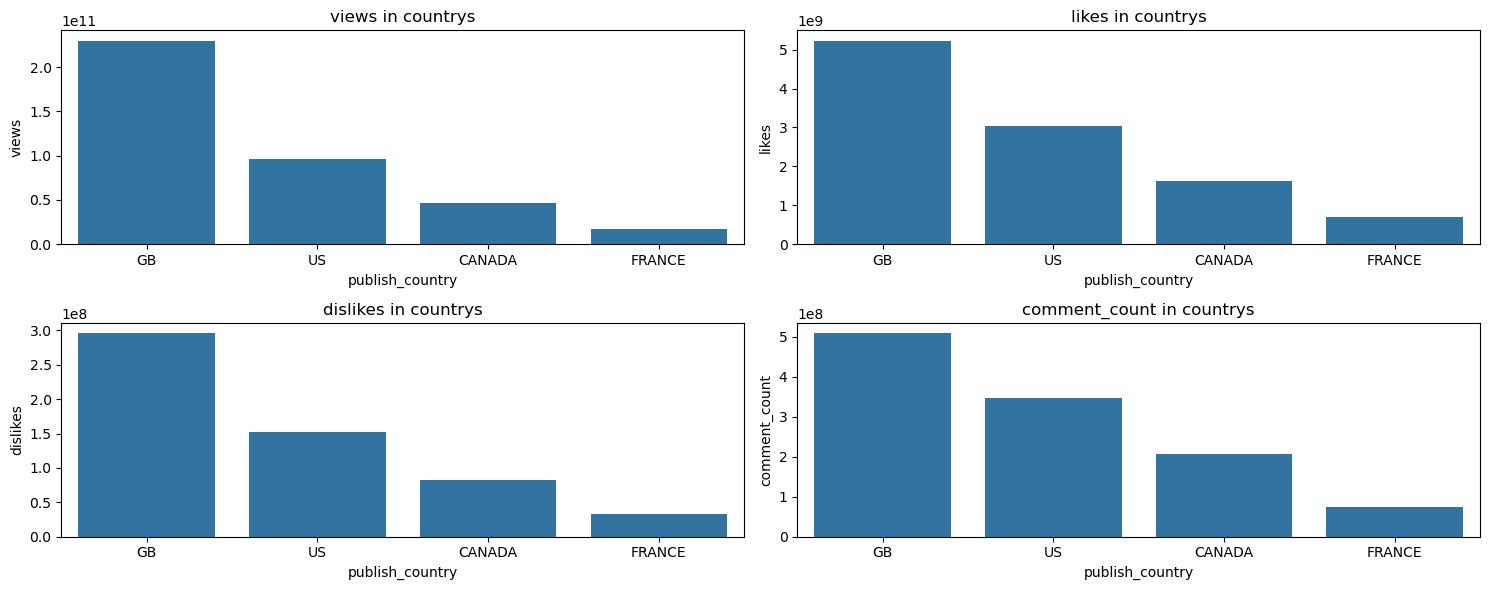

In [9]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))

s_axes  = axes.flatten()
c_axes=0

for i in y_pivot_table_c.columns:
  sns.barplot(data=y_pivot_table_c,x=y_pivot_table_c.iloc[:,:0].index,y=i,ax=s_axes[c_axes])
  s_axes[c_axes].set_title(f'{i} in countrys')
  c_axes+=1

plt.tight_layout()
plt.show()

In [10]:
y_pivot_table_w=df.pivot_table(values=['comment_count','likes','dislikes','views'],index=['published_day_of_week'],aggfunc='mean')
y_pivot_table_w=y_pivot_table_w.sort_values(by='views',ascending=False)
y_pivot_table_w=y_pivot_table_w[['views','likes','dislikes','comment_count']]
y_pivot_table_w

,views,likes,dislikes,comment_count
published_day_of_week,,,,
Friday,3.755648e+06,97310.883970,4175.391028,9519.161589
Thursday,2.778910e+06,74438.458892,3089.967153,6636.460482
Wednesday,2.202413e+06,57720.345902,4505.183457,6963.660304
Sunday,2.110650e+06,61133.835391,3671.925586,7257.793533
Tuesday,2.079608e+06,59799.927755,3704.198882,6945.357846
Monday,1.887318e+06,50407.704947,2710.069893,5588.626226
Saturday,1.444060e+06,43948.362559,1922.829734,5366.709916


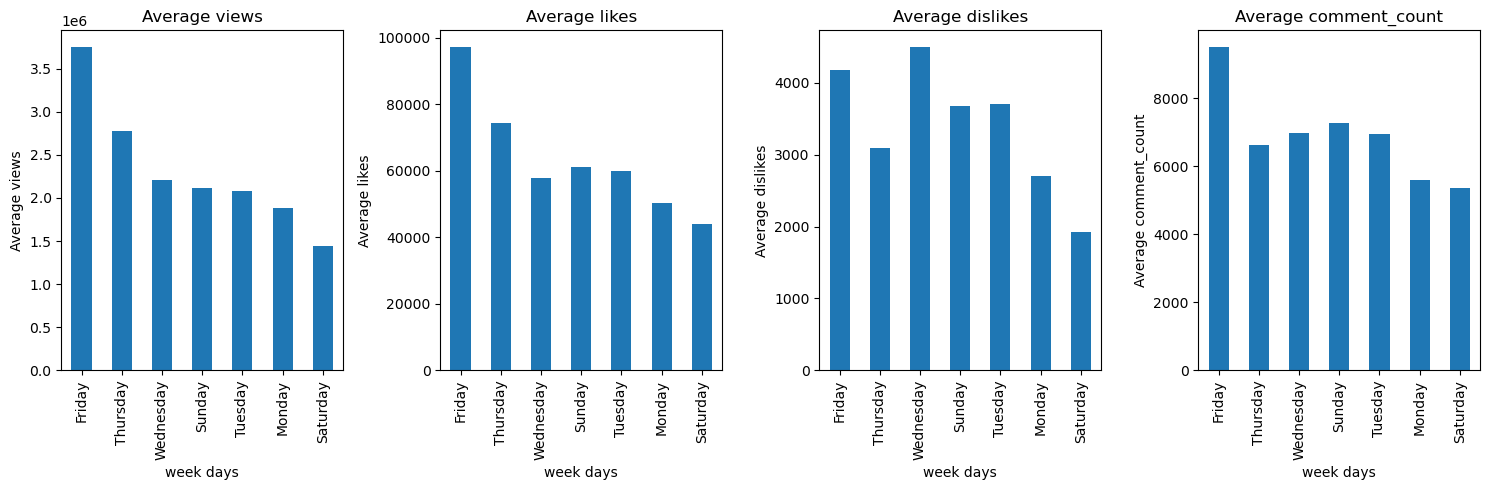

In [11]:
plt.figure(figsize=(15, 5))

c_plot=1
for i in y_pivot_table_w.columns:
  plt.subplot(1,4,c_plot)
  y_pivot_table_w[i].plot(kind='bar')
  plt.title(f'Average {i}')
  plt.xlabel('week days')
  plt.ylabel(f'Average {i}')
  c_plot+=1


plt.tight_layout()
plt.show()


In [12]:
y_pivot_table_cat=df.pivot_table(values=['comment_count','likes','dislikes','views'],index=['category_id'],aggfunc='mean')
y_pivot_table_cat=y_pivot_table_cat.sort_values(by=['views'],ascending=False)
y_pivot_table_cat=y_pivot_table_cat[['views','likes','dislikes','comment_count']]
y_pivot_table_cat

,views,likes,dislikes,comment_count
category_id,,,,
10,8.224924e+06,215087.746837,8687.945812,17782.714296
1,2.134199e+06,45502.739249,1802.394682,5077.721742
29,2.080094e+06,165666.444776,36728.820896,52396.182090
24,1.601619e+06,42029.173120,3948.179211,6173.731007
28,1.438931e+06,36040.603979,1737.994668,5363.940320
17,1.136544e+06,24703.271811,1826.978680,2987.077698
23,1.095755e+06,51232.821431,1539.042982,5077.232147
30,1.067571e+06,16305.882353,784.000000,908.588235
20,1.031163e+06,39458.788462,2779.819527,6216.750555


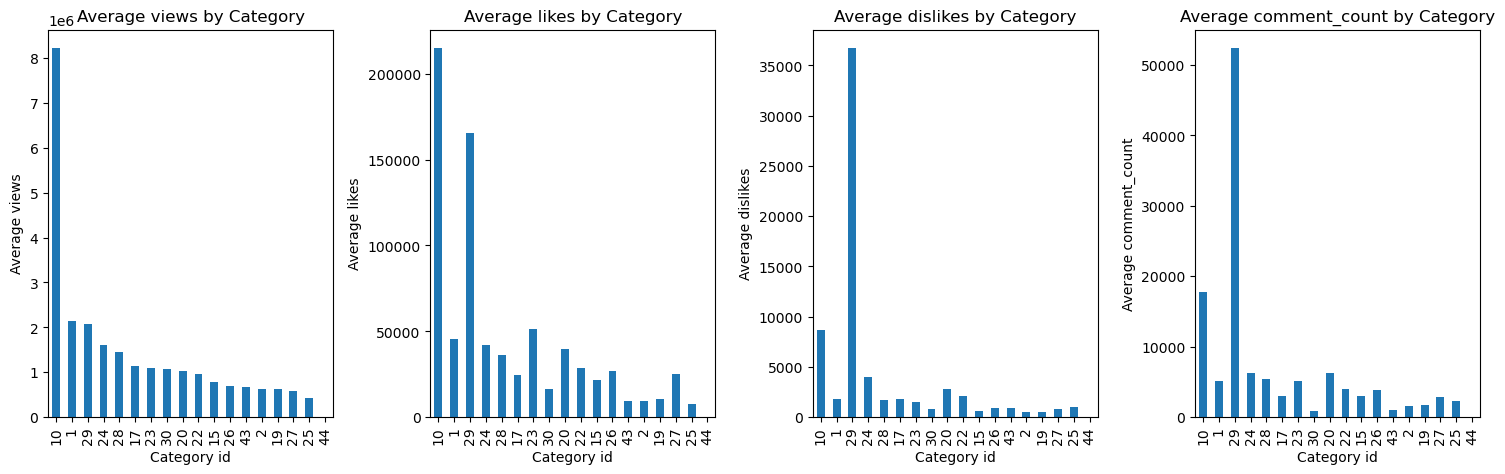

In [13]:
plt.figure(figsize=(15, 5))

c_plot=1
for i in y_pivot_table_cat.columns:
    plt.subplot(1,4,c_plot)
    y_pivot_table_cat[i].plot(kind='bar')
    plt.title(f'Average {i} by Category')
    plt.xlabel('Category id')
    plt.ylabel(f'Average {i}')
    c_plot+=1

plt.tight_layout()
plt.show()

In [14]:
y_pivot_table_d=df.pivot_table(values=['comment_count','likes','dislikes','views'],index=['publish_country','published_day_of_week'],aggfunc='sum')
y_pivot_table_d=y_pivot_table_d.sort_values(by=['publish_country','views'],ascending=False)
y_pivot_table_d= y_pivot_table_d[['views','likes','dislikes','comment_count']]
y_pivot_table_d

views       likes  dislikes  \
publish_country published_day_of_week                                      
US              Friday                 23622601358   773185360  31234258   
                Thursday               16089783826   532821773  24352151   
                Tuesday                13938147018   444856112  26025177   
                Wednesday              13644783188   403181609  27387135   
                Monday                 12299195247   357060219  16696552   
                Sunday                 10864844777   338324561  16876219   
                Saturday                6212414738   191717564   9406663   
GB              Friday                 70000756556  1436403481  65614743   
                Thursday               46233541117  1032553751  39101498   
                Wednesday              33254854396   750738325  60708401   
                Tuesday                27200133065   697664983  49295473   
                Monday                 23418442464   541097864  33389370   
                Sunday                 19466152302   481927854  37204297   
                Saturday               10495318274   294576686  10936602   
FRANCE          Friday                  3962470903   193700004   7347952   
                Sunday                  2346928098   100197875   3640474   
                Monday                  2288733971    84051772   3764135   
                Thursday                2285250949    99307786   3549292   
                Wednesday               2277094302    91359458   7717757   
                Tuesday                 2145450480    80798469   3619481   
                Saturday                1794968741    58728726   3549437   
CANADA          Friday                  9908338860   381943276  15311089   
                Thursday                7048387133   254786791  12674952   
                Wednesday               6898905011   224338335  18893183   
                Tuesday                 6572797108   210323904   9864333   
                Monday                  6251246409   199850826   9701082   
                Sunday                  5442525880   183687911   8597658   
                Saturday                4769774668   163248835   7095622   

                                       comment_count  
publish_country published_day_of_week                 
US              Friday                      81780366  
                Thursday                    49763909  
                Tuesday                     52391078  
                Wednesday                   55251983  
                Monday                      41682003  
                Sunday                      39658706  
                Saturday                    25360119  
GB              Friday                     124657344  
                Thursday                    82218748  
                Wednesday                   76924084  
                Tuesday                     79076154  
                Monday                      56280228  
                Sunday                      57800133  
                Saturday                    32389660  
FRANCE          Friday                      19381557  
                Sunday                       9885226  
                Monday                       8920910  
                Thursday                     9720902  
                Wednesday                   11725049  
                Tuesday                      8588376  
                Saturday                     6402784  
CANADA          Friday                      46638176  
                Thursday                    29424211  
                Wednesday                   33400639  
                Tuesday                     26452401  
                Monday                      24170144  
                Sunday                      23738944  
                Saturday                    22337334

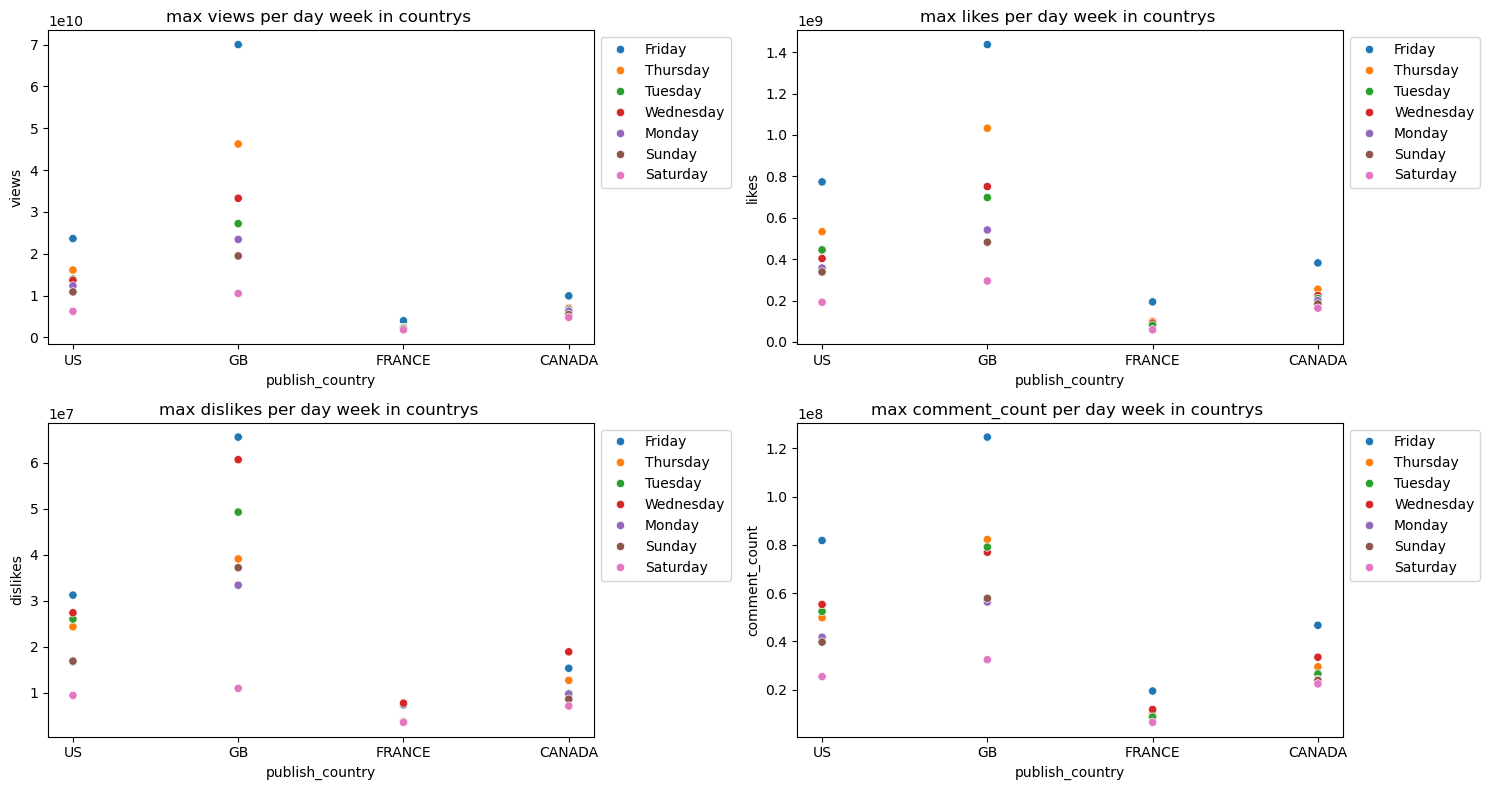

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))

s_axes  = axes.flatten()
c_axes=0

for i in y_pivot_table_d.columns:
  sns.scatterplot(data=y_pivot_table_d,x='publish_country',y=i,hue='published_day_of_week',ax=s_axes[c_axes])
  s_axes[c_axes].set_title(f'max {i} per day week in countrys ')
  s_axes[c_axes].legend(loc='upper left', bbox_to_anchor=(1, 1))
  c_axes+=1

plt.tight_layout()
plt.show()

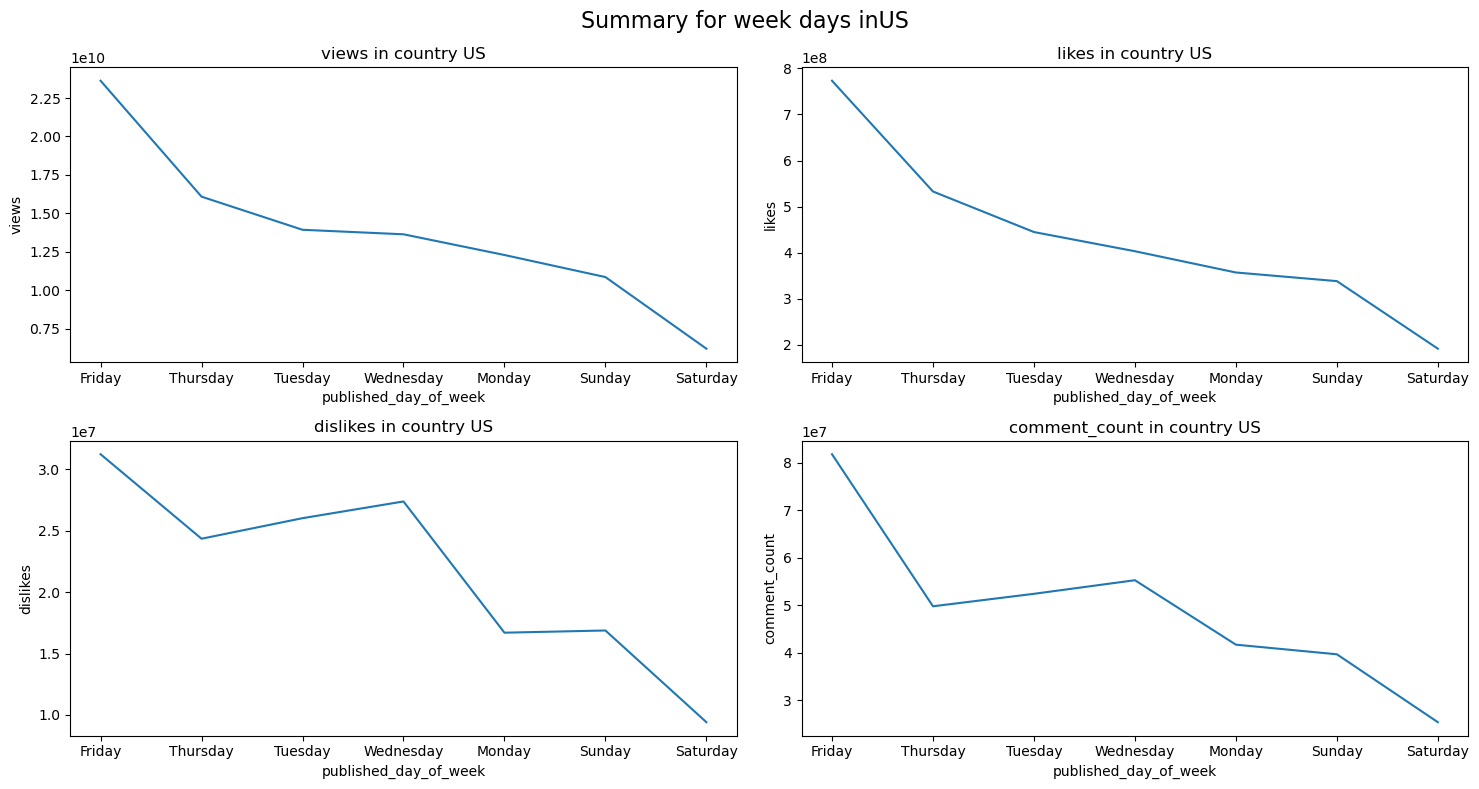

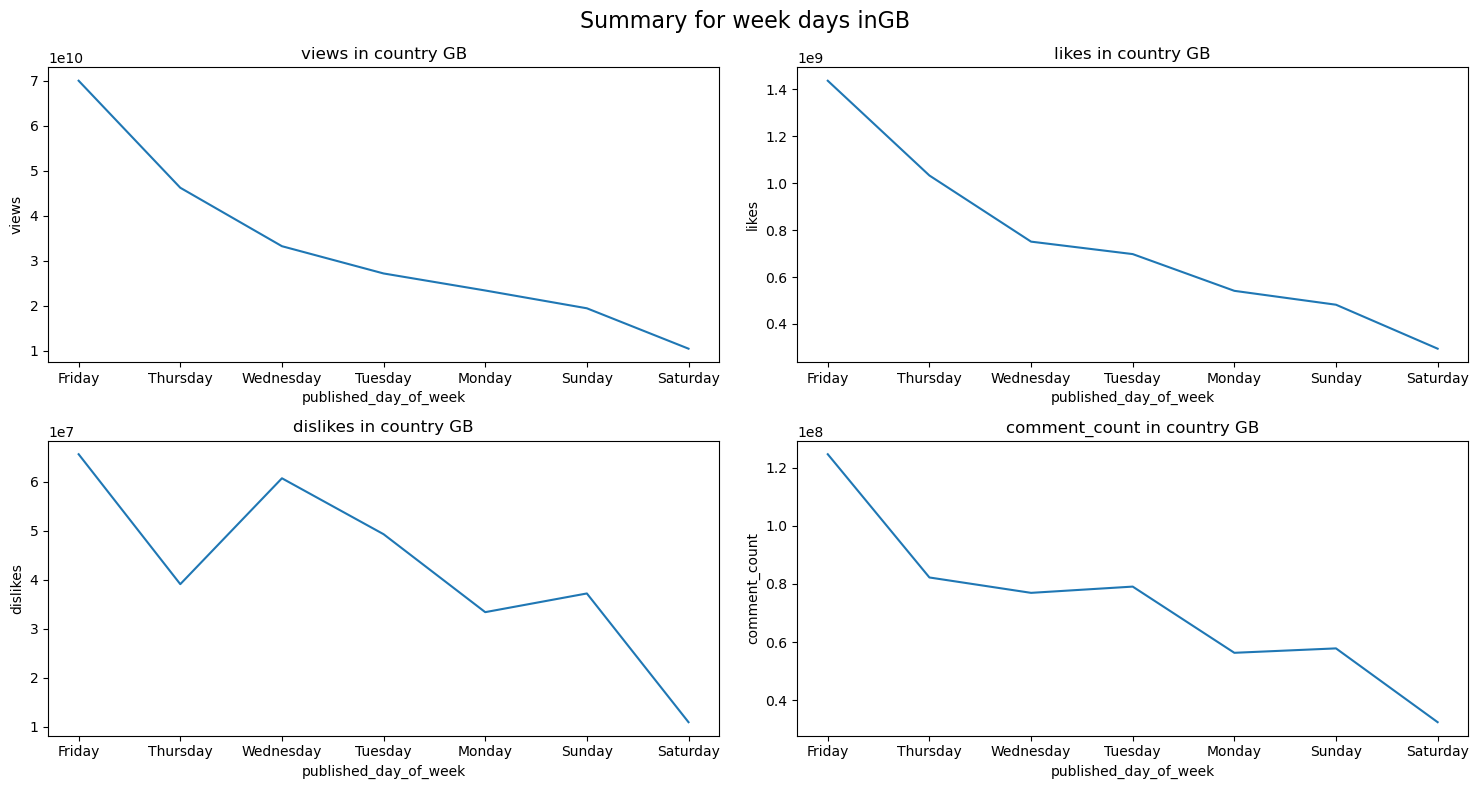

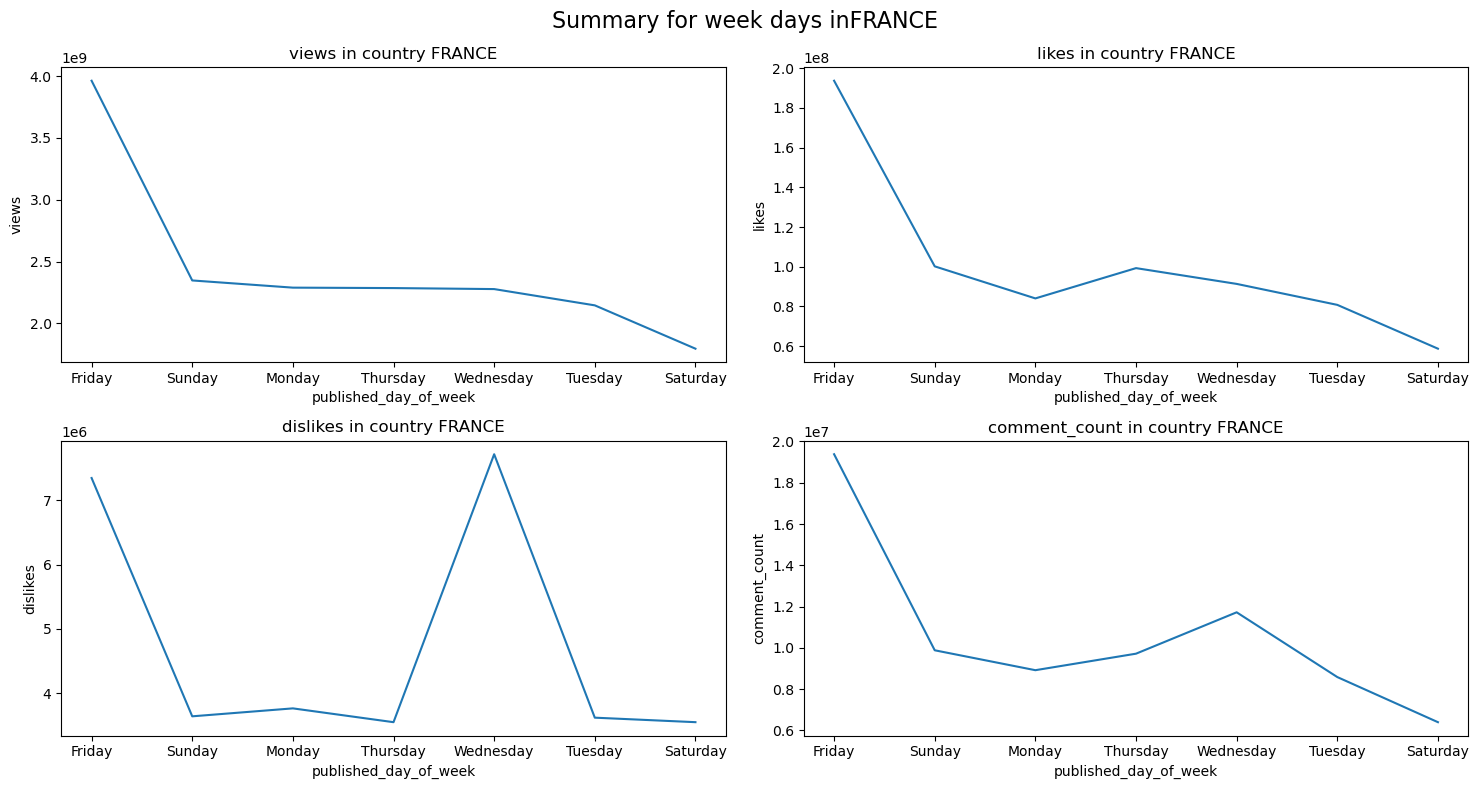

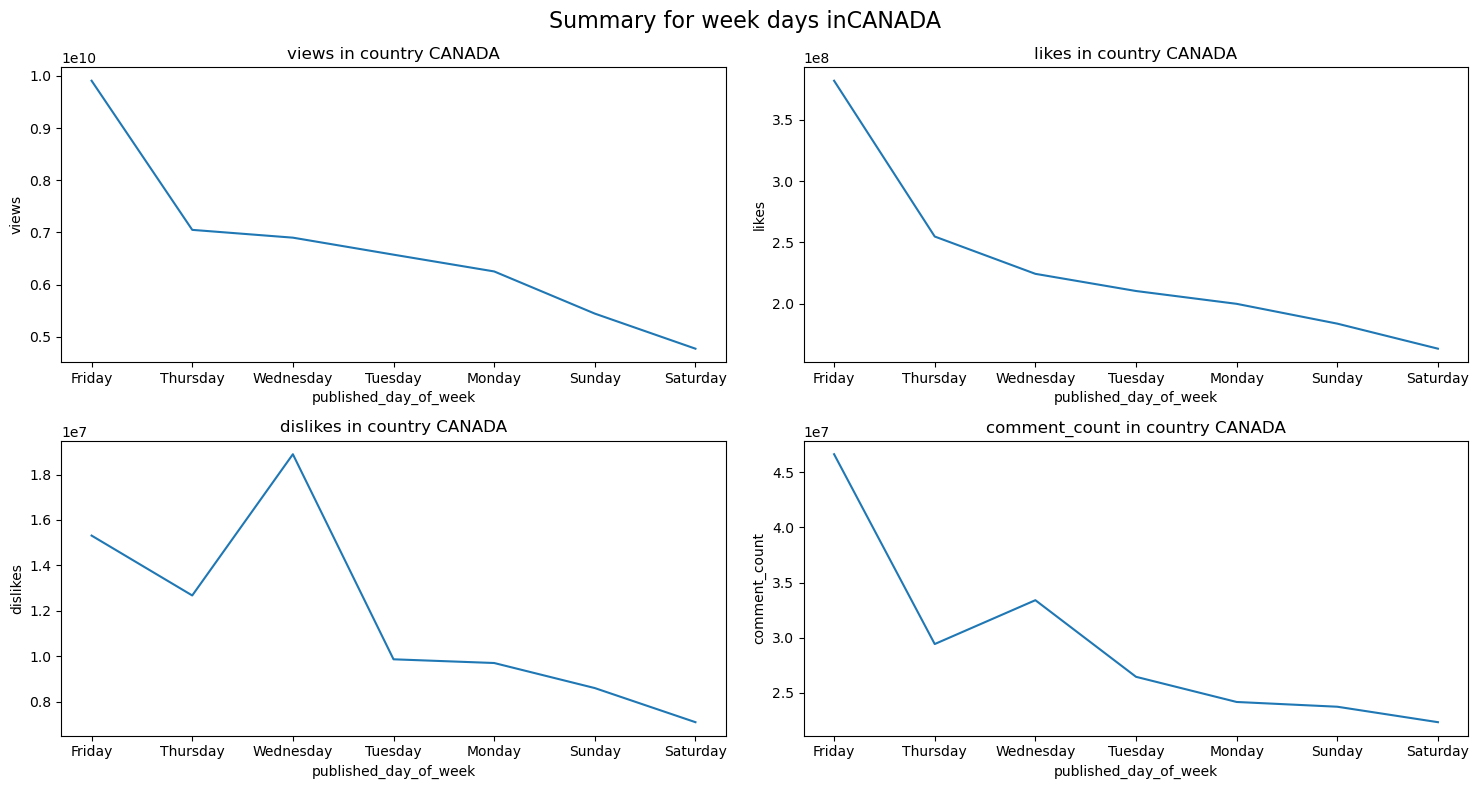

In [16]:
for c in df['publish_country'].unique():
  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
  
  s_axes  = axes.flatten()
  c_axes=0
  plt.suptitle(f'Summary for week days in{c}', fontsize=16)
  for i in y_pivot_table_d.columns:
    day_weak=y_pivot_table_d.loc[c].iloc[:,:0].index
    sns.lineplot(data=y_pivot_table_d.loc[c],x=day_weak,y=i,ax=s_axes[c_axes])
    s_axes[c_axes].set_title(f'{i} in country {c}')
    c_axes+=1
  plt.subplots_adjust(wspace=0.7, hspace=0.7)
  plt.tight_layout()
  plt.show()

In [17]:
y_pivot_table_cc=df.pivot_table(values=['comment_count','likes','dislikes','views'],index=['publish_country','channel_title'],aggfunc='sum')

In [18]:
y_pivot_table_cc=y_pivot_table_cc.sort_values(by='views',ascending=False)
y_pivot_table_cc=y_pivot_table_cc[['views','likes','dislikes','comment_count']]

top5_channels_per_country = y_pivot_table_cc.groupby('publish_country').head(5)
top5_channels_per_country

views      likes  dislikes  \
publish_country channel_title                                           
GB              NickyJamTV            8516190092   65854585   3771823   
                Ozuna                 8305198063   71585436   4743926   
                Bad Bunny             6891280759  106452827   5256551   
                DrakeVEVO             6581834413  148133996   3429228   
                ChildishGambinoVEVO   6101309613  148408057   9558340   
US              ChildishGambinoVEVO   3758488765   96700818   6054434   
                ibighit               2235906679  199247121   3467306   
                Dude Perfect          1870085178   60275557   1501477   
                Marvel Entertainment  1808998971   55873344   1031250   
                ArianaGrandeVevo      1576959172   52170970   1931230   
CANADA          Marvel Entertainment  1011420205   32892782    606296   
                T-Series               799114025   15856204   1067612   
                Dude Perfect           729916338   28298398    590686   
                YouTube Spotlight      635976769   16879595   8898520   
                ibighit                511567918   50259874    912931   
FRANCE          Dude Perfect           305226697   13096494    242481   
                ibighit                291768132   34279338    497164   
                YouTube Spotlight      254422431    7960507   3851449   
                PewDiePie              243522111   18941072    485581   
                Marvel Entertainment   223358474    7762406    163326   

                                      comment_count  
publish_country channel_title                        
GB              NickyJamTV                  2947640  
                Ozuna                       2985745  
                Bad Bunny                   6127443  
                DrakeVEVO                   9225778  
                ChildishGambinoVEVO        15441941  
US              ChildishGambinoVEVO        10151289  
                ibighit                    31817464  
                Dude Perfect                4009163  
                Marvel Entertainment        6453560  
                ArianaGrandeVevo            4295333  
CANADA          Marvel Entertainment        4123846  
                T-Series                    1144248  
                Dude Perfect                2096231  
                YouTube Spotlight           5406288  
                ibighit                     9156753  
FRANCE          Dude Perfect                 955690  
                ibighit                     5753970  
                YouTube Spotlight           2678294  
                PewDiePie                   2222060  
                Marvel Entertainment         883452

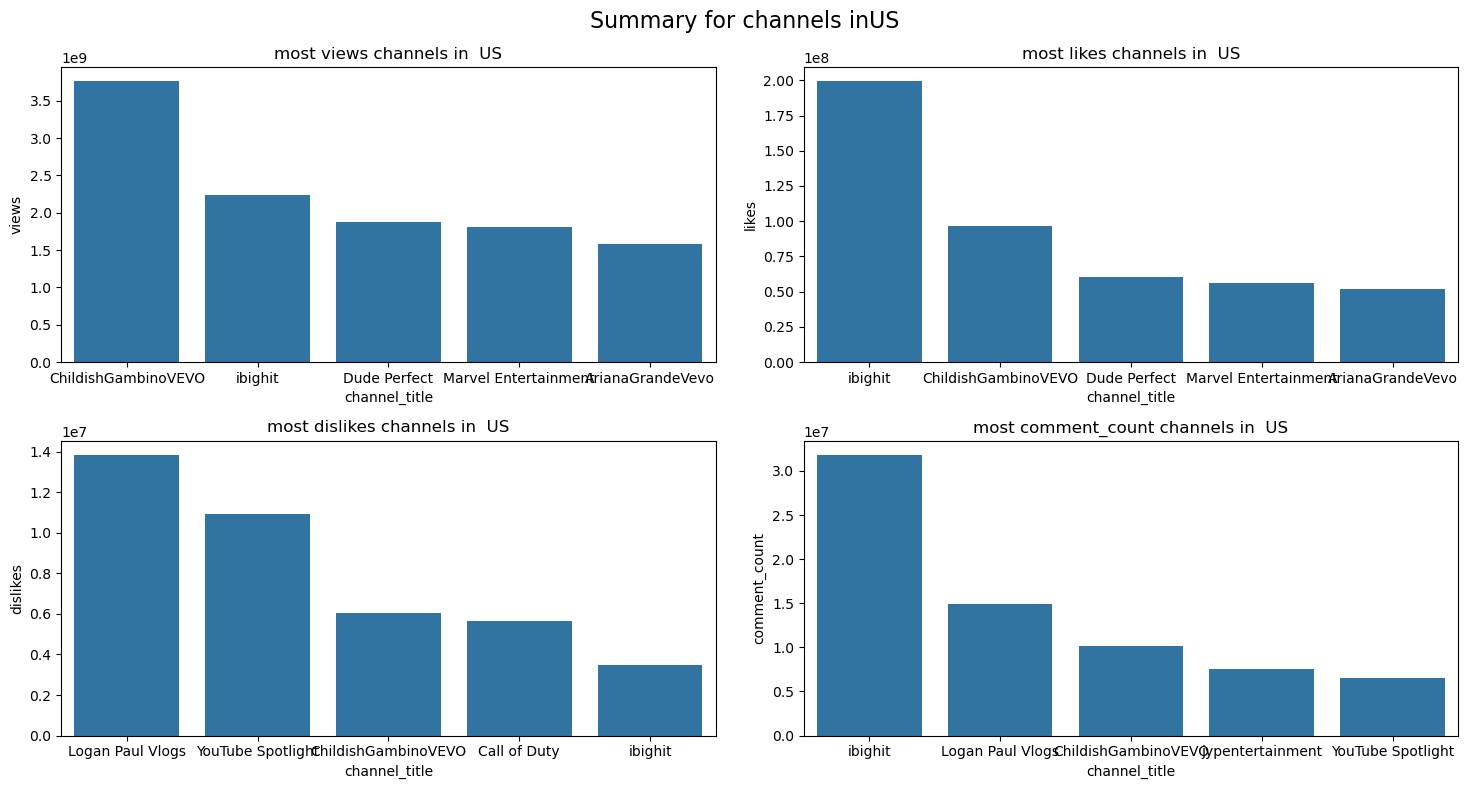

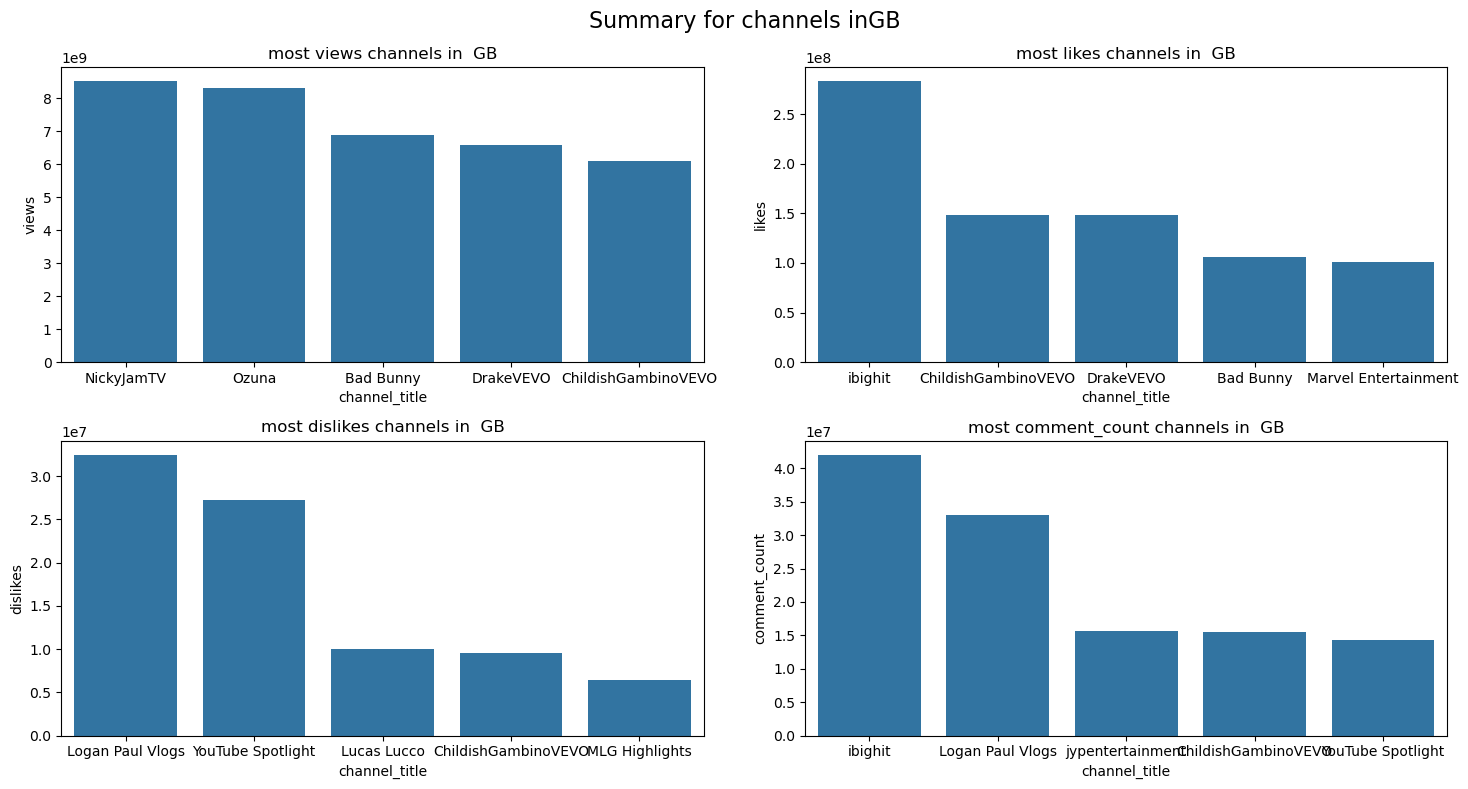

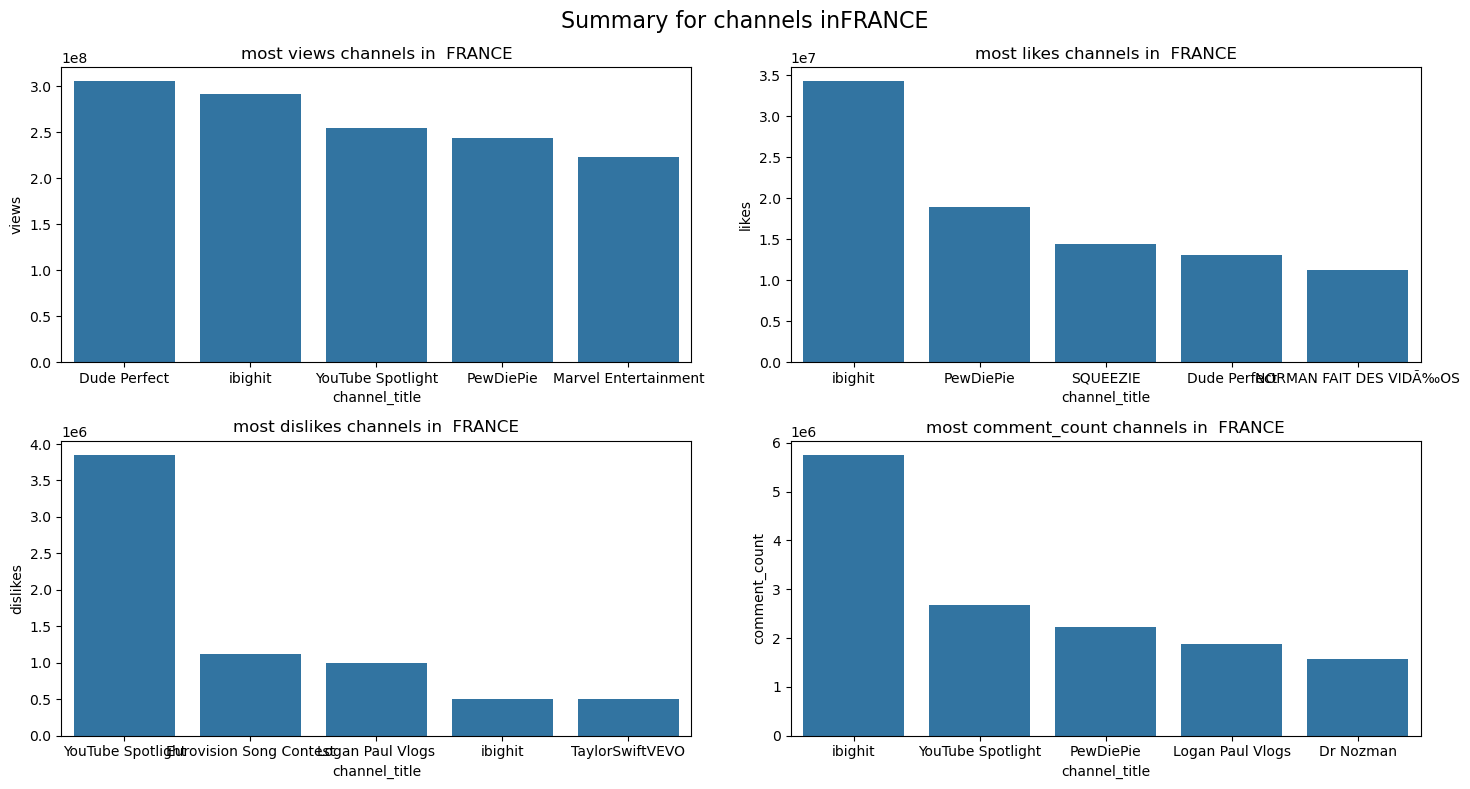

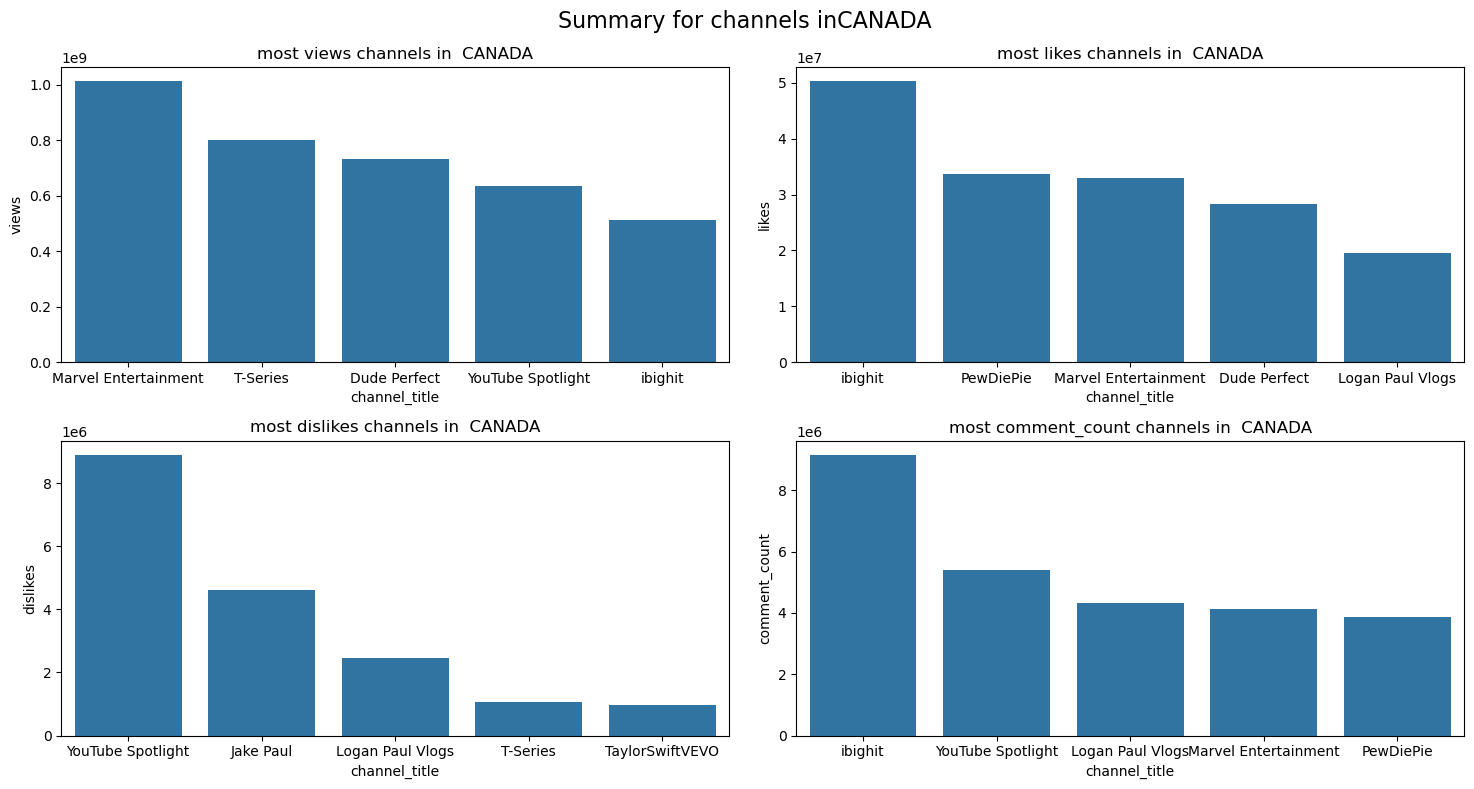

In [19]:
for c in df['publish_country'].unique():
  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

  plt.suptitle(f'Summary for channels in{c}', fontsize=16)
  
  s_axes  = axes.flatten()
  c_axes=0
  for i in y_pivot_table_d.columns:

    y_pivot_table_cc=y_pivot_table_cc.sort_values(by=i,ascending=False)
    y_pivot_table_cc=y_pivot_table_cc[['views','likes','dislikes','comment_count']]

    top5_channels_per_country = y_pivot_table_cc.groupby('publish_country').head(5)
    top5_channels_per_country

    channel_titles=top5_channels_per_country.loc[c].iloc[:,:0].index
    sns.barplot(data=top5_channels_per_country.loc[c],x=channel_titles,y=i,ax=s_axes[c_axes])
    s_axes[c_axes].set_title(f'most {i} channels in  {c}')
    c_axes+=1
  
  plt.subplots_adjust(wspace=0.7, hspace=0.7)
  plt.tight_layout()
  plt.show()

In [20]:
y_pivot_table_c_c=df.pivot_table(values=['comment_count','likes','dislikes','views'],index=['publish_country','category_id'],aggfunc='sum')
top5_cat_per_country=y_pivot_table_c_c.groupby('publish_country').head(5).sort_values(by=['publish_country','views'],ascending=False)
top5_cat_per_country=top5_cat_per_country[['views','likes','dislikes','comment_count']]
top5_cat_per_country

views       likes   dislikes  \
publish_country category_id                                        
US              10            40132892190  1416838584   51179008   
                1              7284156721   165997476    6075148   
                17             4404456673    98621211    5133551   
                15              764651989    19370702     527379   
                2               520690717     4245656     243010   
GB              10           171160864769  3742993052  159370236   
                1              8362707626   147418633    6192934   
                17             3341736194    74888487    9914555   
                15              541320573    15288374     366060   
                2               214184514     3543625     281190   
FRANCE          10             5026447522   277314234    9772318   
                17             1996811039    43964560    2145956   
                1               918517018    24631422    1092744   
                2                43764940     1606767      52260   
                15               43339241     1335449      44591   
CANADA          10            13179850194   564447530   22098190   
                17             2997652188    59449419    3286369   
                1              2939060844    77802003    3111259   
                15              235592173     8830736     185003   
                2               200066074     4732114     197776   

                             comment_count  
publish_country category_id                 
US              10               125296396  
                1                 17887060  
                17                11192155  
                15                 2660705  
                2                   784447  
GB              10               293013140  
                1                 15590011  
                17                10056226  
                15                 1404698  
                2                   505085  
FRANCE          10                25446289  
                17                 4575418  
                1                  2841655  
                2                   207973  
                15                  187590  
CANADA          10                52435252  
                17                 7661342  
                1                 10086573  
                15                 1823538  
                2                  1016188

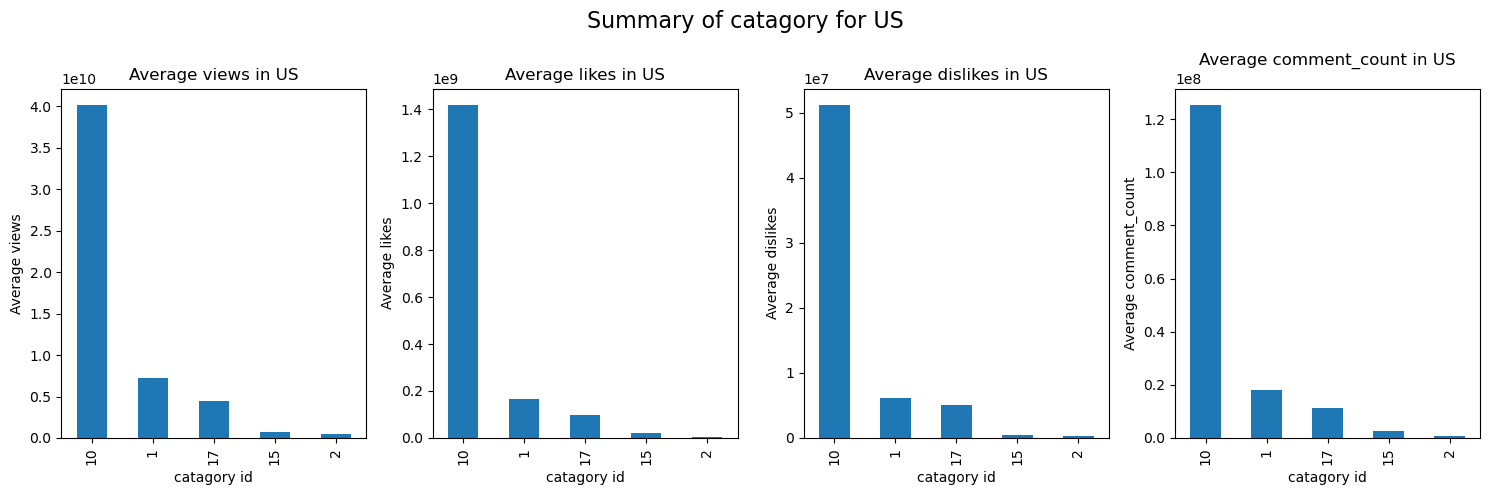

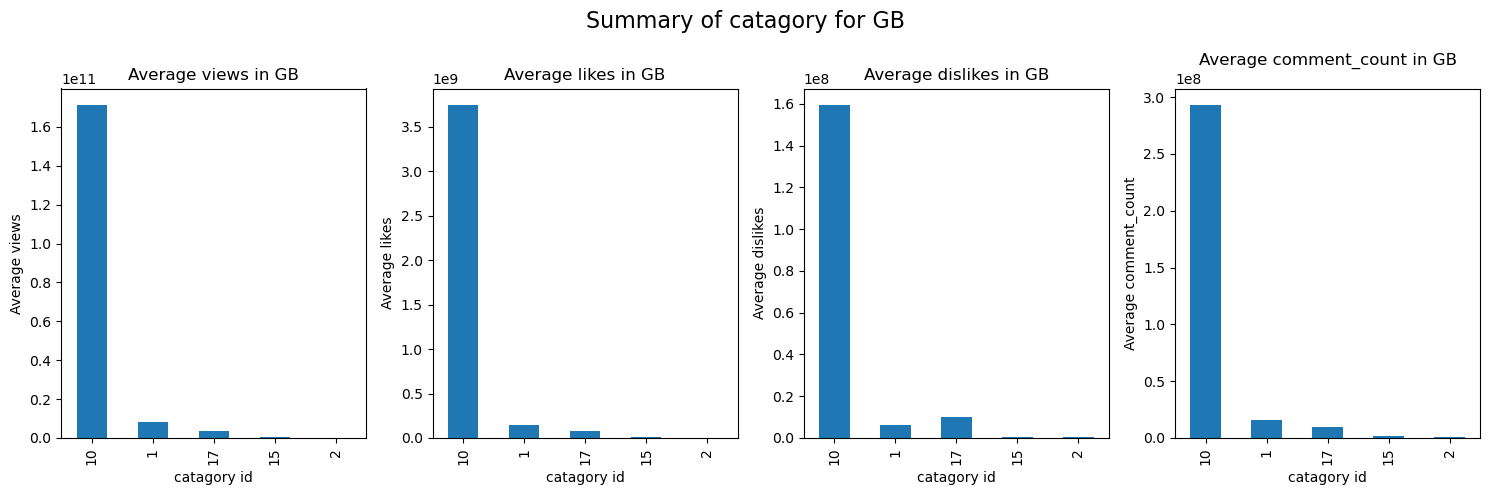

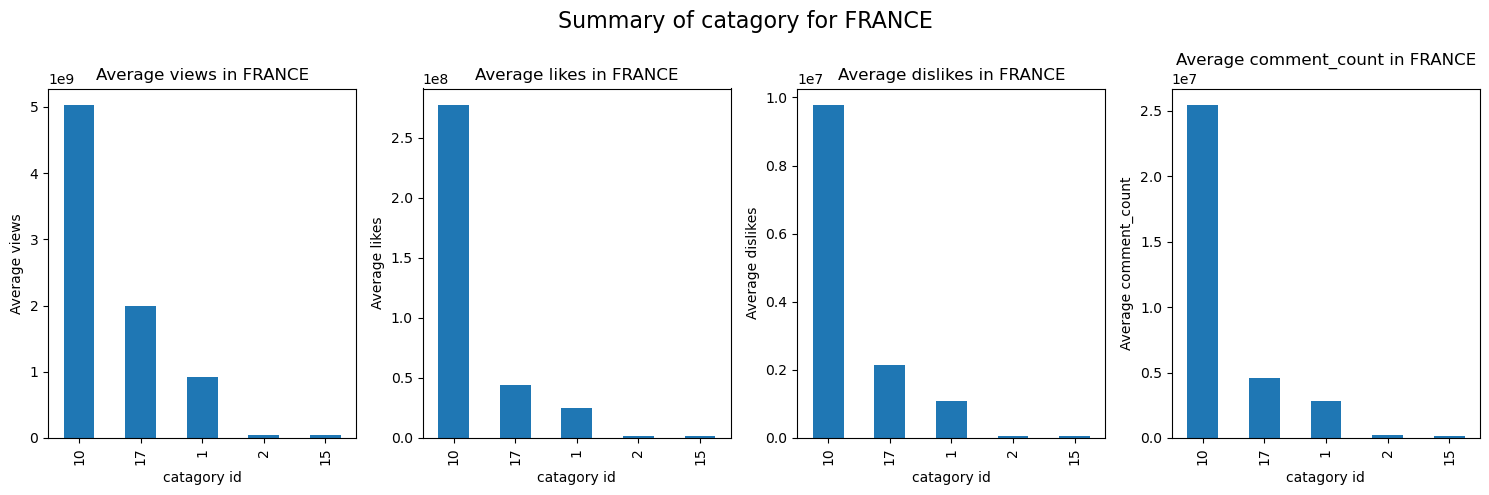

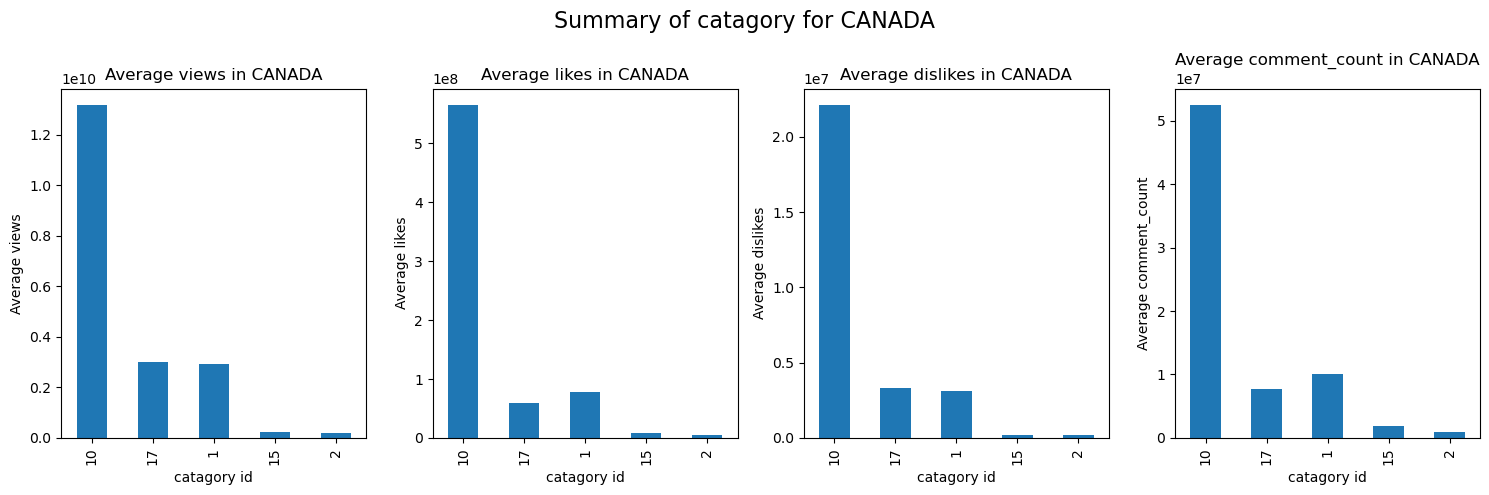

In [21]:
for i in df['publish_country'].unique():
  plt.figure(figsize=(15, 5))
  plt.suptitle(f'Summary of catagory for {i}', fontsize=16)

  c_plot=1
  for j in top5_cat_per_country.columns:
    plt.subplot(1,4,c_plot)
    top5_cat_per_country.loc[i][j].plot(kind='bar')
    plt.title(f'Average {j} in {i}')
    plt.xlabel('catagory id')
    plt.ylabel(f'Average {j}')
    c_plot+=1

  plt.tight_layout()
  plt.show()

Text(0.5, 1.0, 'Correlation Analysis of Engagement Metrics')

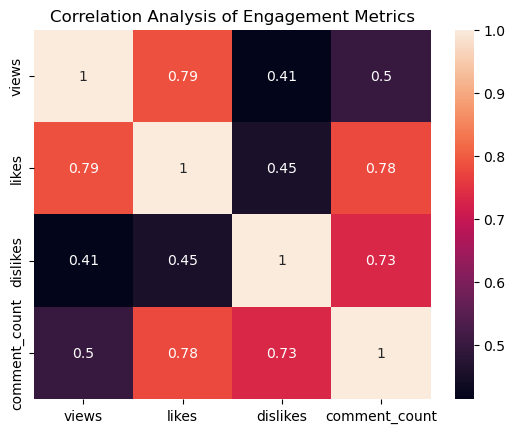

In [22]:
# Correlation analysis
correlation_matrix=df[['views', 'likes', 'dislikes', 'comment_count']].corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Analysis of Engagement Metrics")

In [23]:
 from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col])


In [24]:
X = df.drop("views", axis=1)
y = df["views"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_test_scaled)
print("Linear R2:", r2_score(y_test, lr_pred))


Linear R2: 0.7213209935587959


In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

ridge_params = {"alpha": [0.1, 1, 10]}

ridge = RandomizedSearchCV(
    Ridge(),
    ridge_params,
    n_iter=3,
    cv=3
)

ridge.fit(X_train_scaled, y_train)

ridge_pred = ridge.predict(X_test_scaled)
print("Ridge R2:", r2_score(y_test, ridge_pred))

Ridge R2: 0.7213252343170284


In [27]:
from sklearn.tree import DecisionTreeRegressor

dt = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    {"max_depth": [5, 10]},
    cv=2
)
dt.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [5, 10]})

In [28]:
from xgboost import XGBRegressor

xgb = GridSearchCV(
    XGBRegressor(
        objective="reg:squarederror",
        tree_method="hist",
        verbosity=0
    ),
    {
        "n_estimators": [100],
        "max_depth": [3],
        "learning_rate": [0.1]
    },
    cv=2,
    n_jobs=-1
)
xgb.fit(X_train, y_train)


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [3],
                         'n_estimators': [100]})

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    {
        "n_estimators": [100],
        "learning_rate": [0.1]
    },
    cv=2
)
gb.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.1], 'n_estimators': [100]})

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    {
        "n_estimators": [100],
        "max_depth": [10]
    },
    cv=2,
    n_jobs=-1
)
rf.fit(X_train, y_train)


GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10], 'n_estimators': [100]})

In [31]:
final_models={
    "Linear Regression":lr,
    "Ridge Regression": ridge.best_estimator_,
    "Decision Tree": dt.best_estimator_,
    "XGBoost": xgb.best_estimator_,
    "Gradient Boosting": gb.best_estimator_,
    "Random Forest": rf.best_estimator_
}
    

In [32]:
from sklearn.metrics import r2_score
import pandas as pd

scores = []

for model_name, model in final_models.items():
    
    # scaled only for linear & ridge
    if model_name in ["Linear Regression", "Ridge Regression"]:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    scores.append({
        "Model": model_name,
        "R2 Score": r2_score(y_test, y_pred)
    })

results_df = pd.DataFrame(scores)
results_df = results_df.sort_values(by="R2 Score", ascending=False)

results_df

,Model,R2 Score
5,Random Forest,0.974472
2,Decision Tree,0.953041
4,Gradient Boosting,0.919619
3,XGBoost,0.891935
1,Ridge Regression,0.721325
0,Linear Regression,0.721321


In [33]:
best_model_name = results_df.iloc[0]["Model"]

# Get actual model
best_model = final_models[best_model_name]
best_model_name

'Random Forest'